In [1]:
import sklearn as skl
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
test = pd.read_csv("C:/Users/Harshavardhan/Downloads/Black Friday Sales/test.csv")
train = pd.read_csv("C:/Users/Harshavardhan/Downloads/Black Friday Sales/train.csv")



In [3]:
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [5]:
train['Product_Category_2'].fillna((train['Product_Category_2'].mean()),inplace=True)
train['Product_Category_3'].fillna((train['Product_Category_3'].mean()),inplace=True)

In [6]:
train=train.drop('User_ID',axis=1)
train=train.drop('Product_ID',axis=1)

In [7]:
train['Age']=(train['Age'].str.strip('+'))
train['Stay_In_Current_City_Years']=(train['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

<AxesSubplot:>

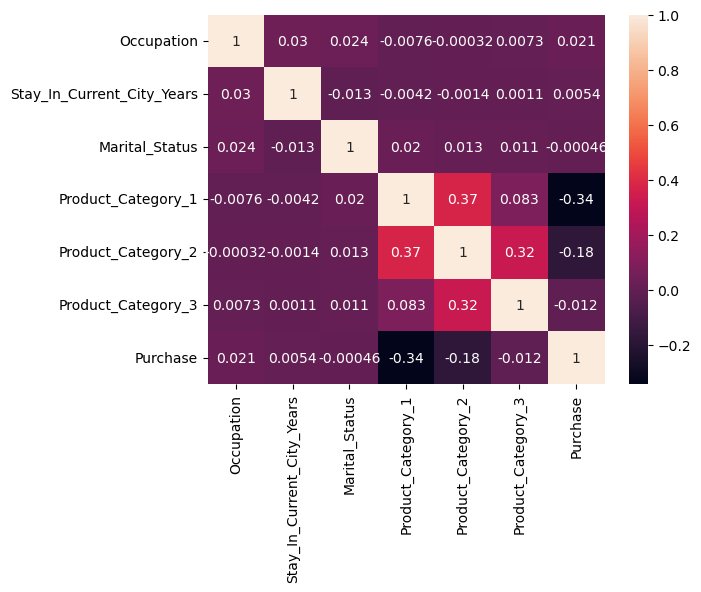

In [8]:
sns.heatmap(train.corr(),annot=True)

In [9]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [10]:
test['Product_Category_2'].fillna((test['Product_Category_2'].mean()),inplace=True)
test['Product_Category_3'].fillna((test['Product_Category_3'].mean()),inplace=True)

In [11]:
categorical_col = ['Gender', 'City_Category']
numerical_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [12]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+',4)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)

In [13]:
train['Age']=train['Age'].replace('0-17',17)
train['Age']=train['Age'].replace('18-25',25)
train['Age']=train['Age'].replace('26-35',35)
train['Age']=train['Age'].replace('36-45',45)
train['Age']=train['Age'].replace('46-50',50)
train['Age']=train['Age'].replace('51-55',55)
train['Age']=train['Age'].replace('55+',60)
test['Age']=test['Age'].replace('0-17',17)
test['Age']=test['Age'].replace('18-25',25)
test['Age']=test['Age'].replace('26-35',35)
test['Age']=test['Age'].replace('36-45',45)
test['Age']=test['Age'].replace('46-50',50)
test['Age']=test['Age'].replace('51-55',55)
test['Age']=test['Age'].replace('55+',60)

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [15]:
encoder = LabelEncoder()

for col in categorical_col:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])
    
    

In [16]:
scaler = StandardScaler()

for col in numerical_col:
    train[col] = scaler.fit_transform(train[col].values.reshape(-1, 1))
    test[col] = scaler.transform(test[col].values.reshape(-1, 1))

In [17]:
train


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,-2.116497,0.294864,0,0.109801,0,-0.610809,4.221533e-16,-7.819065e-16,8370
1,0,-2.116497,0.294864,0,0.109801,0,-1.118912,-9.131340e-01,5.862050e-01,15200
2,0,-2.116497,0.294864,0,0.109801,0,1.675656,4.221533e-16,-7.819065e-16,1422
3,0,-2.116497,0.294864,0,0.109801,0,1.675656,9.880753e-01,-7.819065e-16,1057
4,1,1.691235,1.214734,2,1.660861,0,0.659449,4.221533e-16,-7.819065e-16,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1,1.691235,0.754799,1,-0.665728,1,3.708069,4.221533e-16,-7.819065e-16,368
550064,0,-0.312835,-1.084943,2,0.885331,0,3.708069,4.221533e-16,-7.819065e-16,371
550065,0,-0.312835,1.061423,1,1.660861,1,3.708069,4.221533e-16,-7.819065e-16,137
550066,0,1.691235,-1.084943,2,0.109801,0,3.708069,4.221533e-16,-7.819065e-16,365


In [18]:
X = train.drop(['Purchase'], axis=1)
y = train[['Purchase']]
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [20]:
gb = GradientBoostingRegressor()

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

print (rmse)


C:\Users\Harshavardhan\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


2997.848485836643


In [21]:
print(r2_score(y_pred, y_val))

0.3988535748798737


In [22]:
reg=linear_model.LinearRegression()
lm_model=reg.fit(X_train,y_train)
pred=lm_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val,pred))
print(r2_score(y_val,pred))
print(rmse)

0.12813877783677619
4680.442495648552


In [24]:
reg=RandomForestRegressor()
lm_model=reg.fit(X_train,y_train)
pred1=lm_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val,pred1))
print(r2_score(y_val,pred1))
print(rmse)

C:\Users\Harshavardhan\AppData\Local\Temp\ipykernel_12656\2721990906.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lm_model=reg.fit(X_train,y_train)


0.6266878424039586
3062.6636196920563


In [30]:
from xgboost import XGBRegressor

In [31]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)
y_pred2 = xgb_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred2, y_val))

print (xgb_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [33]:
print(r2_score(y_val,y_pred2))
print(rmse)

0.6667933102952635
2893.4773619942193


XGBooster gave the best results